# Exercise 10 - Data frames and Statistics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io as io

# 1. Running a basic statistical analysis
## 1.1. Introduction
There are 1000 mouse femur bones which have been measured at high resolution and a number of shape analyses run on each sample. - Phenotypical Information - Each column represents a metric which was assessed in the images - CORT_DTO__C_TH for example is the mean thickness of the cortical bone.

# 1.2 Data preparation
![Workflow](workflow_ComparingSample.svg)
## 1.2.1. Load data into frames
For this example we will start with a fairly complicated dataset from a genetics analysis done at the Institute of Biomechanics, ETHZ.

In [7]:
pheno = pd.read_csv('phenoTable.csv')
pheno.head()

,BMD,MECHANICS_STIFFNESS,CORT_DTO__C_TH,CORT_DTO__C_TH_SD,CORT_MOM__J,CT_TH_RAD,CT_TH_RAD_STD,CANAL_VOLUME,CANAL_COUNT,CANAL_DENSITY,...,CANAL_THETA,CANAL_THETA_CV,CANAL_PCA1,CANAL_PCA1_CV,CANAL_PCA2,CANAL_PCA2_CV,CANAL_PCA3,CANAL_PCA3_CV,FEMALE,ID
0,0.030221,57.163181,0.186455,0.019785,0.103288,78.558303,17.440679,18351.469264,31.0,72.458800,...,59.576428,0.281042,443.537228,1.326217,120.150958,1.677884,30.294477,0.700402,0,351
1,0.032788,54.972011,0.183007,0.015696,0.126947,88.691516,22.238608,27002.217716,137.0,206.113056,...,54.487601,0.401896,293.627859,1.272190,84.416139,1.541258,34.940901,0.804821,0,356
2,0.036075,73.590881,0.216930,0.028019,0.171012,79.973567,8.862339,18464.688139,128.0,177.921019,...,56.120693,0.356876,326.470697,1.155693,87.714578,1.051160,32.911487,0.754326,0,357
3,0.031145,49.854823,0.193758,0.024087,0.099639,88.215056,23.288367,42840.614369,147.0,247.019809,...,50.206993,0.445938,243.130372,1.014527,81.448541,1.162161,37.690527,0.944862,0,359
4,0.034226,66.578296,0.175598,0.018144,0.176490,79.330125,15.968669,25474.883270,271.0,349.344731,...,53.561597,0.441762,243.212520,1.041145,80.598173,1.394151,39.716728,1.075045,1,360


Genetic Information (genoTable.csv)
Each animal has been tagged at a number of different regions of the genome (called markers: D1Mit236)
- At each marker there are 3 (actually 4) possibilities
- A is homozygous (the same from both parents) from the A strain
- B is homozygous from the B strain
- H is heterozygous (one from A, one from B)
- ‘-’ is missing or erronous measurements

In [8]:
geno  = pd.read_csv('genoTable.csv')
geno.head(5)

,ID,D1Mit64,D1Mit236,D1Mit7,D1Mit386,D1Mit14,D1Mit540,D1Mit17,D2Mit365,D2Mit323,...,D18Mit64,D18Mit147,D18Mit123,D18Mit9,D18Mit4,D19Mit68,D19Mit40,D19MIT88,D19MIT17,D19MIT108
0,351,H,H,H,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H
1,353,B,B,B,B,H,H,H,H,A,...,H,A,A,A,H,H,H,H,H,H
2,354,H,A,A,A,A,H,H,H,H,...,H,-,H,H,A,H,H,A,H,H
3,355,A,A,H,H,-,H,H,A,A,...,H,H,A,A,A,A,A,-,A,A
4,356,H,A,A,A,A,A,H,H,-,...,B,H,B,B,H,B,B,B,-,H


## 1.2.2. [Merge data frames](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
We want to merge the data set using the key 'ID'

In [6]:
df = pd.merge(pheno,geno, on='ID')
df.head()

,BMD,MECHANICS_STIFFNESS,CORT_DTO__C_TH,CORT_DTO__C_TH_SD,CORT_MOM__J,CT_TH_RAD,CT_TH_RAD_STD,CANAL_VOLUME,CANAL_COUNT,CANAL_DENSITY,...,D18Mit64,D18Mit147,D18Mit123,D18Mit9,D18Mit4,D19Mit68,D19Mit40,D19MIT88,D19MIT17,D19MIT108
0,0.030221,57.163181,0.186455,0.019785,0.103288,78.558303,17.440679,18351.469264,31.0,72.458800,...,H,H,H,H,H,H,H,H,H,H
1,0.032788,54.972011,0.183007,0.015696,0.126947,88.691516,22.238608,27002.217716,137.0,206.113056,...,B,H,B,B,H,B,B,B,-,H
2,0.036075,73.590881,0.216930,0.028019,0.171012,79.973567,8.862339,18464.688139,128.0,177.921019,...,B,H,H,A,A,H,H,H,H,B
3,0.031145,49.854823,0.193758,0.024087,0.099639,88.215056,23.288367,42840.614369,147.0,247.019809,...,-,A,H,B,B,B,B,B,B,B
4,0.034226,66.578296,0.175598,0.018144,0.176490,79.330125,15.968669,25474.883270,271.0,349.344731,...,B,-,B,B,H,H,H,H,H,B


## 1.2.3. Rename a column
The key 'FEMALE' is a boolean, we want to change the key name to 'GENDER' and the contents from true/false to 'F'/'M'. Here, a [lambda function](https://realpython.com/python-lambda/) is used for the mapping when we apply an operation to each row in the GENDER column.

In [5]:
df=df.rename(columns={"FEMALE": "GENDER"})
df['GENDER'] = df['GENDER'].apply(lambda x: 'F' if x else 'M')

## 1.3. Tasks

### 1.3.1 First inspection
1. Look at the histograms of the available variables in the phenotype data.

/Users/kaestner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


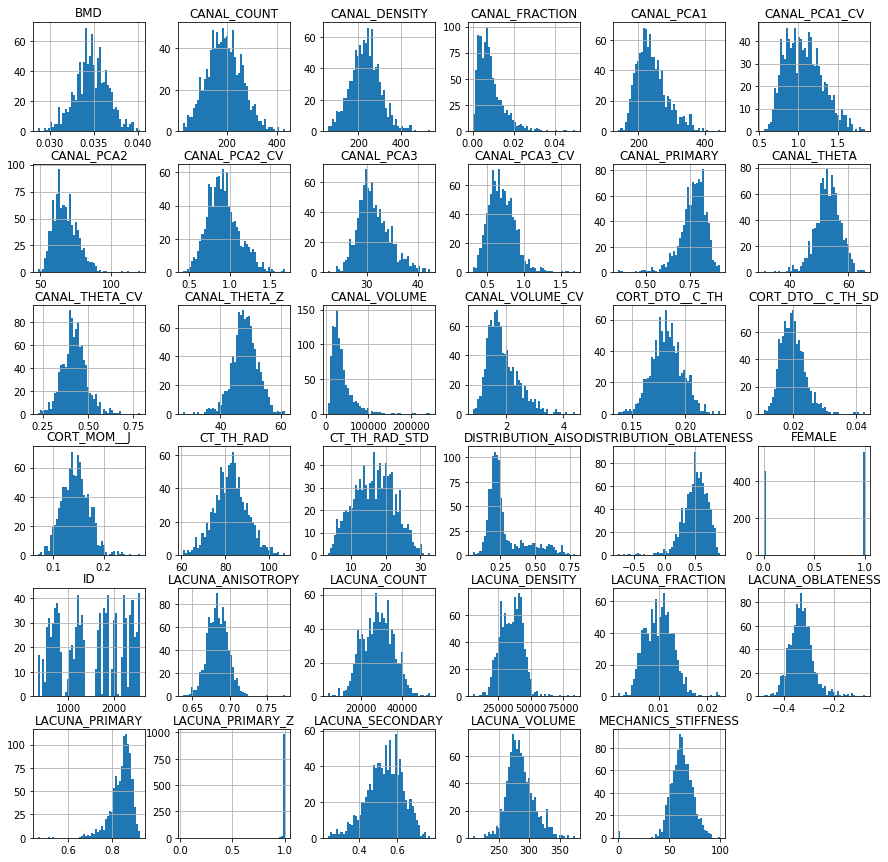

In [7]:
fig,ax=plt.subplots(1,1,figsize=(15,15));
pheno.hist(ax=ax,bins=50);

These are far too many variables to work with. At least for a start. We have to focus on some few e.g.
- Bone mineral density (BMD)
- Cortical bone thickness (CORT_DTO_TH)
- Cortical bone Microstructural thickness (CORT_DTO_TH_SD)

### 1.3.2 Look at the pair plot
Explore the data and correlations between various metrics by using the ‘pairplot’ plotting component. Examine different variable combinations.

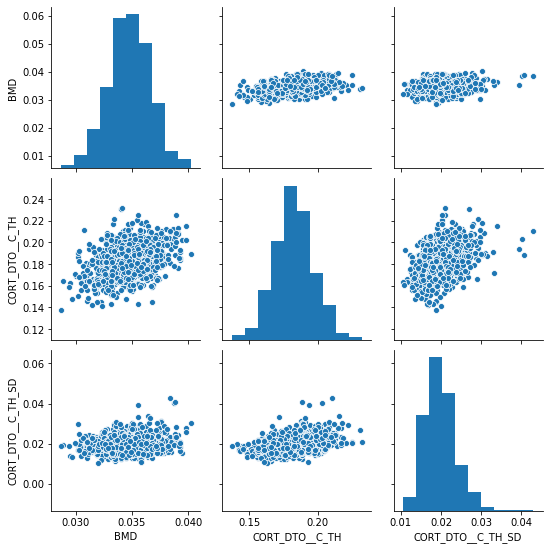

In [9]:
sns.pairplot(pheno, vars = ['BMD', 'CORT_DTO__C_TH', 'CORT_DTO__C_TH_SD']);

3. For the rest of the analysis you can connect the various components to the ‘Column Filter’ node since that is the last step in the processing
4. Use one of the T-Test nodes in the Statistics -> Hypothesis Testing section to see if there is a statistically significant difference between Gender’s when examining Cortical Bone Microstructural Thickness (Mean)
    - Which value is the p-value?
    - What does the p-value mean, is it significant, by what criterion?
5. Use another node from the Hypothesis Testing section to evaluate the effect on the D16Mit5 on the Lacuna Distribution Anisotropy? Is it significant?

## 1.3.3 Questions
1. In the ‘Independent Groups T-Test’ node we can run a t-test against all of the columns at the same time, why SHOULDN’T we do this?
2. If we do, how do we need to interpret this in the results
3. Is p<0.05 a sufficient signifance criteria?

## 2. Comparing two real bone samples
For this example we will compare two real cortical bone samples taken from mice.
For the purpose of the analysis and keeping the data sizes small, we will use Kevin’s Crazy Camera again for simulating the noisy detection process. The assignment aims to be more integrative and you will combine a number of different lectures to get to the final answer.

In [27]:
imgA = (0.0 < io.imread('bone_7H3A_B1.tif')).astype(float)
imgB = (0.0 < io.imread('bone_7H6A_B2.tif')).astype(float)

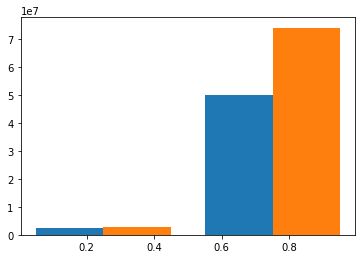

In [28]:
plt.hist([imgA.ravel(), imgB.ravel()],bins=2);

Create data for the exercise

In [25]:
import numpy as numpy
import skimage.filters as filters

def camera(img,blurr=1.0,noise=0.1,illum=0.0) :

    res = filters.gaussian(img,sigma=blurr)
    res = res + np.random.normal(size=res.shape,loc=0,scale=noise)

    return res

def crappyCamera(img) :
    return camera(img,blurr=2.0,noise=0.2, illum=0.0)


In [29]:
cimgA=crappyCamera(imgA)
cimgB=crappyCamera(imgB)

### 2.1 Questions
1. We want to know if there is a statistically significant difference in
    - cell volume
    - cell shape
    - cell density
    
    between the two samples given the variation in the detector
  1. which metric do we need here? 
  2. why?
2. We see in the volume comparison a very skewed representation of the data Volume/Num Pixels
    - why is this? (Hint check the segmented images)
    - What might be done to alleviate it (hint Row Filter)

### 2.2 Hints
1. Look at the kind of noise (you can peek inside the Crappy Camera) to choose the proper filter
2. Use an automated thresholding technique for finding the bone automatic-methods
3. To do this we will need to enhance the image, segment out the bone (dense) tissue, find the mask so that we can look at the cells.
4. We then need to label the cells, and analyze their volume and shape: labeling
5. Use Morphology and strongly filter parameters it might be possible to maximize the differences in the groups
6. Create a data frame with columns for sample_id, item_id and metric. Look for ideas in the previous exercises and lectures.
7. 

``` R
library(ggplot2)
cur.df<-data.frame(
  sample=as.factor(knime.in$"Image Number"),
    measurement=knime.in$"Measurement_Number",
    volume=knime.in$"Num Pix"
    )
    
ggplot(cur.df,aes(x=volume))+
    geom_density(aes(color=sample,group=measurement))+
    theme_bw(25)
```

## 3. T-Test Simulator
This exercise (workflow named - Statistical Significance Hunter) shows the same results as we discussed in the lecture for finding p-values of significance. 

It takes a completely random stream of numbers with a mean 0.0 and tests them against a null hypothesis (that they equal 0) in small batches, you can adjust the size of the batches, the number of items and the confidence interval. The result is a pie chart showing the number of “significant” results found using the standard scientific criteria for common studies. 

### T-test for single value $\mathcal{H}_0$

In [89]:
from scipy.stats import ttest_1samp

data= np.random.normal(size=(100,3),loc=0,scale=1.0)

tset, pval = ttest_1samp(data, 0.0) # Test if data has average = 0

print("p-values",pval)

reject = pval < 0.05
print("Reject : ", reject)
for idx,r in enumerate(reject) :
    if r :    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    else:
        print("we are accepting null hypothesis")

p-values [0.5454642  0.07249996 0.5228359 ]
Reject :  [False False False]
we are accepting null hypothesis
we are accepting null hypothesis
we are accepting null hypothesis


In [93]:
def statSignificanceHunter(batches=10,samples=10) :
    testLevels=[0.05,0.01]
    data= np.random.normal(size=(samples,batches),loc=0,scale=1.0)

    tset, pval = ttest_1samp(data, 0.0)
    
    counts=[np.sum(testLevels[0]<=pval),np.sum(pval<testLevels[0])-np.sum(pval<testLevels[1]),np.sum(pval<testLevels[1])]
    return pval, counts

In [94]:
statSignificanceHunter(batches=100,samples=100)

(array([0.79206974, 0.57890943, 0.92223658, 0.98714915, 0.43599646,
        0.64723901, 0.7515128 , 0.51009473, 0.45215769, 0.68812201,
        0.78687749, 0.8194841 , 0.07001857, 0.29997952, 0.50234364,
        0.47928087, 0.63421718, 0.05124783, 0.03984158, 0.11596082,
        0.1668919 , 0.3390591 , 0.45256506, 0.54503567, 0.81723939,
        0.05914485, 0.07248351, 0.37699265, 0.91320193, 0.23286284,
        0.03527441, 0.09456155, 0.13488008, 0.79568404, 0.79003145,
        0.04684554, 0.8169016 , 0.00964711, 0.14343745, 0.39495838,
        0.53575609, 0.96201107, 0.82282785, 0.44819238, 0.22868395,
        0.80663696, 0.75337552, 0.30326937, 0.82419385, 0.73020215,
        0.70068896, 0.59202829, 0.27272358, 0.25387106, 0.99083937,
        0.68525766, 0.42299808, 0.50733427, 0.72583149, 0.39449051,
        0.09140351, 0.77240519, 0.9672547 , 0.88784488, 0.56781758,
        0.82643914, 0.01411524, 0.07857076, 0.99530014, 0.90726876,
        0.20911543, 0.45250161, 0.56763614, 0.64

### 3.1 Task
1. Write a program that tests the random data with different batch sizes

### 3.2 Questions
1. If we change the size of the chunks to the same as the number of elements in the list do we still expect to find ‘significant’ (<0.05) values? Why or why not?
2. How does comparing against the null hypothesis being 0 relate to comparing two groups?
3. How does comparing a single column compare to looking at different metrics for the same samples?
4. What is bonferroni correction (hint: wikipedia) and how could it be applied to this simulation?

Make the modification needed

## 4 Grammar of Graphics Plots 
This is a walk through demonstration using ggplot instead of matplotlib for plotting data.

### 4.1 Introduction
Making plots or graphics should be divided into separate independent components. 
- Setup is the ggplot command and the data 
- Mapping is in the aes command ```ggplot(input data frame,aes(x=name of x column,y=name of y column))+```
- Plot is the next command (geom_point, geom_smooth, geom_density, geom_histogram, geom_contour) ```geom_point()+```
- Coordinates can then be added to any type of plot (coord_equal, coord_polar, etc) 
- Scales can also be added (scale_x_log10, scale_y_sqrt, scale_color_gradientn) 
- Labels are added labs(x="x label",y="y label",title="title")

### 4.2 Tasks
1. Load the necessary libraries

In [30]:
from plotnine import *
from plotnine.data import *

2. Load the phenoTable from the first exercise

In [32]:
pheno = pd.read_csv('phenoTable.csv')
pheno2 = pheno[['ID','BMD','MECHANICS_STIFFNESS','CORT_DTO__C_TH','CORT_DTO__C_TH_SD']]
pheno2.head()

,ID,BMD,MECHANICS_STIFFNESS,CORT_DTO__C_TH,CORT_DTO__C_TH_SD
0,351,0.030221,57.163181,0.186455,0.019785
1,356,0.032788,54.972011,0.183007,0.015696
2,357,0.036075,73.590881,0.216930,0.028019
3,359,0.031145,49.854823,0.193758,0.024087
4,360,0.034226,66.578296,0.175598,0.018144


- Setup the input table as ```pheno``` and the map	ping with the x position mapped to BMD (Bone Mineral Density) and the y position as CT_TH_RAD (Cortical Bone Thickness)

- Create the first simple plot by adding a point representation to the plot

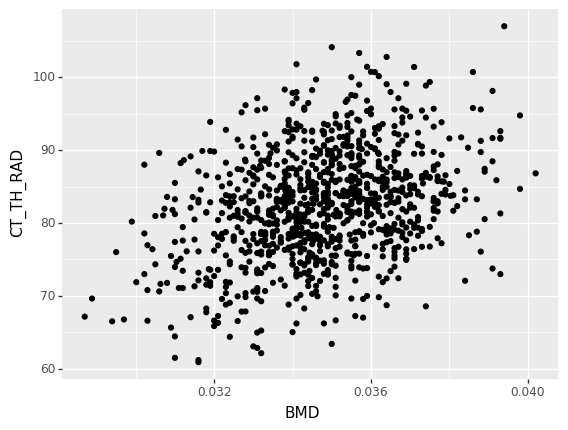

<ggplot: (8786299353293)>

In [41]:
ggplot(pheno,aes(x="BMD",y="CT_TH_RAD")) \
    + geom_point()

- Change color of the points to show if the animal is female or not (in the mapping)

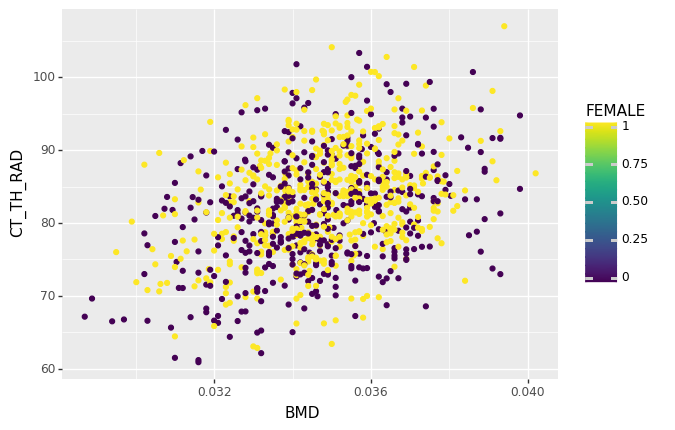

<ggplot: (8786299351573)>

In [45]:
ggplot(pheno,aes(x="BMD",y="CT_TH_RAD",color="FEMALE"))+geom_point()

- Show the color as a discrete (factor) value instead of a number
  - First we need some data frame manipulation to change the boolean 0/1 into labels.

In [58]:
m=pheno
m=m.rename(columns={"FEMALE": "GENDER"})
m['GENDER'] = m['GENDER'].apply(lambda x: 'F' if x else 'M')

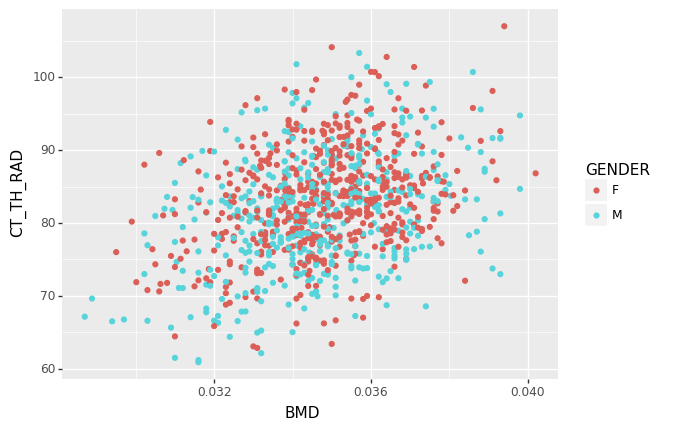

<ggplot: (8786299448101)>

In [59]:
ggplot(m,aes(x="BMD",y="CT_TH_RAD",color="GENDER"))+geom_point()

- Make the plot in two facets (windows) instead of the same one

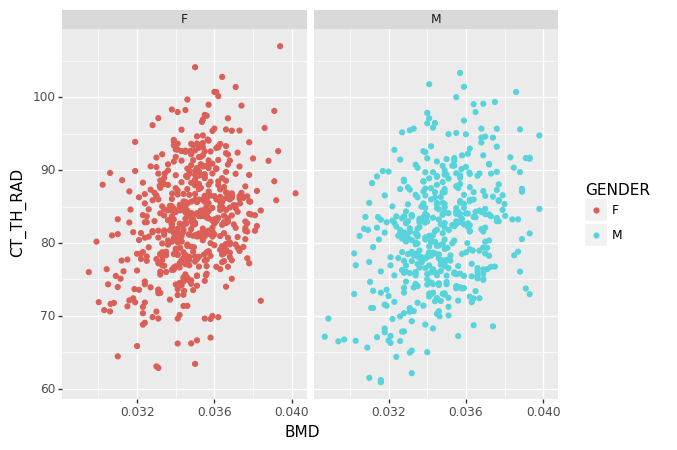

<ggplot: (8786313435037)>

In [65]:
ggplot(m,aes(x="BMD",y="CT_TH_RAD",color="GENDER")) \
  + geom_point() \
  + facet_wrap("GENDER")
  

For more information and tutorial read about it in: http://ggplot2.org/

## Task: Finalize the figures with decorations 
The previous plots are not publication ready, explore the different plot grammar components to add decorations 
- Plot is the next command (geom_point, geom_smooth, geom_density, geom_histogram, geom_contour) geom_point()+
- Coordinates can then be added to any type of plot (coord_equal, coord_polar, etc)
- Scales can also be added (scale_x_log10, scale_y_sqrt, scale_color_gradientn)
- Labels are added labs(x="x label",y="y label",title="title")